In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("h1b.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df.columns= df.columns.str.lower()

In [7]:
df.columns

Index(['unnamed: 0', 'case_number', 'case_status', 'case_submitted',
       'decision_date', 'visa_class', 'employment_start_date',
       'employment_end_date', 'employer_name', 'employer_business_dba',
       'employer_address', 'employer_city', 'employer_state',
       'employer_postal_code', 'employer_country', 'employer_province',
       'employer_phone', 'employer_phone_ext', 'agent_representing_employer',
       'agent_attorney_name', 'agent_attorney_city', 'agent_attorney_state',
       'job_title', 'soc_code', 'soc_name', 'naics_code', 'total_workers',
       'new_employment', 'continued_employment', 'change_previous_employment',
       'new_concurrent_employment', 'change_employer', 'amended_petition',
       'full_time_position', 'prevailing_wage', 'pw_unit_of_pay',
       'pw_wage_level', 'pw_source', 'pw_source_year', 'pw_source_other',
       'wage_rate_of_pay_from', 'wage_rate_of_pay_to', 'wage_unit_of_pay',
       'h1b_dependent', 'willful_violator', 'support_h1b', 'lab

In [8]:
#Remove all descriptive columns
cols= ["unnamed: 0","case_number","employer_address","employer_business_dba","employer_name","employer_phone","employer_phone_ext"]

In [9]:
df.drop(cols,1,inplace=True)

In [10]:
#Remove all redundant geographical data- just keep the state variable
cols= ["employer_city","employer_postal_code","employer_country","employer_province","agent_attorney_city","worksite_city","worksite_county","worksite_postal_code"]

In [11]:
df.drop(cols,1,inplace=True)

In [12]:
#For some of these, more than 50% of the data in the column is missing. I'm going to write a function to remove these

def delete_col(col):
    if df[col].isnull().sum()/df.shape[0] >0.4:
        df.drop([col],1,inplace=True)

In [13]:
for col in df.columns:
    delete_col(col)

In [14]:
df.columns

Index(['case_status', 'case_submitted', 'decision_date', 'visa_class',
       'employment_start_date', 'employment_end_date', 'employer_state',
       'agent_representing_employer', 'agent_attorney_name', 'job_title',
       'soc_code', 'soc_name', 'naics_code', 'total_workers', 'new_employment',
       'continued_employment', 'change_previous_employment',
       'new_concurrent_employment', 'change_employer', 'amended_petition',
       'full_time_position', 'prevailing_wage', 'pw_unit_of_pay',
       'pw_wage_level', 'pw_source', 'pw_source_year', 'pw_source_other',
       'wage_rate_of_pay_from', 'wage_rate_of_pay_to', 'wage_unit_of_pay',
       'h1b_dependent', 'willful_violator', 'worksite_state'],
      dtype='object')

In [15]:
#Now we need to see how many missing numbers each column has
df.isnull().sum()

case_status                         0
case_submitted                      0
decision_date                       0
visa_class                          0
employment_start_date              29
employment_end_date                30
employer_state                     18
agent_representing_employer     96506
agent_attorney_name                 0
job_title                           5
soc_code                            2
soc_name                            3
naics_code                          7
total_workers                       0
new_employment                      0
continued_employment                0
change_previous_employment          0
new_concurrent_employment           0
change_employer                     0
amended_petition                    0
full_time_position                  5
prevailing_wage                     1
pw_unit_of_pay                     46
pw_wage_level                  123720
pw_source                          46
pw_source_year                     45
pw_source_ot

In [16]:
#Dealing with missing data for categorical variables
#We will impute the mode for all categorical variables
def imputer_categorical(column):
        if df[column].isnull().sum()>0:
            df[column]= df[column].fillna(df[column].mode()[0])
        return df

In [17]:
#Dealing with missing data for numerical variables
#We will impute the mean for all categorical variables

def imputer_numerical(column):
        if df[column].isnull().sum()>0:
            df[column]= df[column].fillna(df[column].mean())
        return df

In [18]:
#We need to first ensure that the columns have the correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624650 entries, 0 to 624649
Data columns (total 33 columns):
case_status                    624650 non-null object
case_submitted                 624650 non-null object
decision_date                  624650 non-null object
visa_class                     624650 non-null object
employment_start_date          624621 non-null object
employment_end_date            624620 non-null object
employer_state                 624632 non-null object
agent_representing_employer    528144 non-null object
agent_attorney_name            624650 non-null object
job_title                      624645 non-null object
soc_code                       624648 non-null object
soc_name                       624647 non-null object
naics_code                     624643 non-null object
total_workers                  624650 non-null int64
new_employment                 624650 non-null int64
continued_employment           624650 non-null int64
change_previous_employment  

In [19]:
#pw_source_year seems to have the wrong data type
df.pw_source_year= df.pw_source_year.astype(str)
df.pw_source_year= df.pw_source_year.str.split(".")
df.pw_source_year=df.pw_source_year.apply(lambda x:x[0])

In [20]:
#Separating numerical columns 
int_cols= list(df.select_dtypes(include='int').columns)
float_cols= list(df.select_dtypes(include='float64').columns)
num_cols= int_cols+ float_cols

In [21]:
for col in num_cols:
    imputer_numerical(col)

In [22]:
df.isnull().sum()

case_status                         0
case_submitted                      0
decision_date                       0
visa_class                          0
employment_start_date              29
employment_end_date                30
employer_state                     18
agent_representing_employer     96506
agent_attorney_name                 0
job_title                           5
soc_code                            2
soc_name                            3
naics_code                          7
total_workers                       0
new_employment                      0
continued_employment                0
change_previous_employment          0
new_concurrent_employment           0
change_employer                     0
amended_petition                    0
full_time_position                  5
prevailing_wage                     0
pw_unit_of_pay                     46
pw_wage_level                  123720
pw_source                          46
pw_source_year                      0
pw_source_ot

In [23]:
#Imputing missing values for all other categorical columns
for col in df.columns:
    imputer_categorical(col)

In [24]:
df.isnull().sum()

case_status                    0
case_submitted                 0
decision_date                  0
visa_class                     0
employment_start_date          0
employment_end_date            0
employer_state                 0
agent_representing_employer    0
agent_attorney_name            0
job_title                      0
soc_code                       0
soc_name                       0
naics_code                     0
total_workers                  0
new_employment                 0
continued_employment           0
change_previous_employment     0
new_concurrent_employment      0
change_employer                0
amended_petition               0
full_time_position             0
prevailing_wage                0
pw_unit_of_pay                 0
pw_wage_level                  0
pw_source                      0
pw_source_year                 0
pw_source_other                0
wage_rate_of_pay_from          0
wage_rate_of_pay_to            0
wage_unit_of_pay               0
h1b_depend

In [25]:
df.describe()

,total_workers,new_employment,continued_employment,change_previous_employment,new_concurrent_employment,change_employer,amended_petition,prevailing_wage,wage_rate_of_pay_from,wage_rate_of_pay_to
count,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,624650.000000,6.246500e+05,6.246500e+05,6.246500e+05
mean,1.893800,0.834251,0.326300,0.130657,0.008979,0.259485,0.332703,7.321117e+04,8.285702e+04,2.416596e+04
std,4.826703,3.556236,1.243793,0.955791,0.157690,1.095563,1.418231,2.574023e+05,4.266316e+04,5.255086e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.682600e+04,6.300000e+04,0.000000e+00
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.022100e+04,7.600000e+04,0.000000e+00
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.914900e+04,1.000000e+05,0.000000e+00
max,155.000000,150.000000,55.000000,50.000000,50.000000,150.000000,50.000000,2.016227e+08,1.688000e+06,3.000000e+06


In [26]:
#The next thing we need to have a look at is the class imbalance in our target variable
df.case_status.value_counts()

CERTIFIED              545694
CERTIFIED-WITHDRAWN     49704
WITHDRAWN               20772
DENIED                   8480
Name: case_status, dtype: int64

In [27]:
#We only need certified and denied cases- I will first remove the withdrawn categories
final= df.loc[df["case_status"]!="WITHDRAWN"]
finale = final.loc[final["case_status"]!="CERTIFIED-WITHDRAWN"]
df= finale

In [28]:
df.case_status.value_counts()

CERTIFIED    545694
DENIED         8480
Name: case_status, dtype: int64

In [29]:
#I am going to manually under sample the dominant class to reduce the class imbalance
denied= df.loc[df["case_status"]=="DENIED"]
certified= df.loc[df["case_status"]=="CERTIFIED"]
certified_sample= certified.sample(frac=0.02)
df= pd.concat([denied,certified_sample])
df= df.sample(frac=1)

In [30]:
df.shape

(19394, 33)

In [31]:
#Dealing with dates
import datetime

In [32]:
#Converting all dates into datetime objects
def date_converter(column):
    df[column]= pd.to_datetime(df[column])
    return df

In [33]:
cols = ["case_submitted","decision_date","employment_start_date","employment_end_date"]

In [34]:
for x in cols:
    date_converter(x)

In [35]:
#A function to subtract dates to get two new variables- employment_length,application_duration
def date_diff(final_col, end_date, start_date):
    df[final_col]= end_date - start_date
    df[final_col]= df[final_col].apply(lambda x:str(x))
    df[final_col]=df[final_col].str.split(" ")
    df[final_col]=df[final_col].apply(lambda x:x[0])
    return df[final_col].value_counts()

In [36]:
#Application duration
end_date = df.decision_date
start_date= df.case_submitted
final_col= "application_duration"
date_diff(final_col,end_date,start_date)

6     8711
4     3248
7     1901
2     1602
5     1585
1     1193
3     1028
8      117
10       4
0        3
9        2
Name: application_duration, dtype: int64

In [37]:
#Employment length
end_date = df.employment_end_date
start_date= df.employment_start_date
final_col= "employment_length"
date_diff(final_col,end_date,start_date)

1095    9723
1096    3743
1094    1986
729      610
730      574
1093     494
364      183
365      108
1077      50
1091      44
1092      43
770       36
728       33
1087      31
1089      29
1065      24
1064      19
1090      19
1083      18
727       18
1084      16
1088      16
1086      13
998       13
1066      13
1085      13
1082      12
1028      12
1080      11
545       11
        ... 
542        1
579        1
932        1
271        1
666        1
282        1
811        1
338        1
605        1
1025       1
952        1
179        1
688        1
919        1
328        1
631        1
620        1
925        1
250        1
752        1
609        1
571        1
756        1
941        1
292        1
903        1
885        1
76         1
202        1
480        1
Name: employment_length, Length: 727, dtype: int64

In [38]:
#Now we can drop the original date columns
df.drop(["case_submitted","decision_date","employment_start_date","employment_end_date"],1,inplace=True)

In [79]:
df.employment_length= df.employment_length.astype(int)
df.application_duration= df.application_duration.astype(int)

In [80]:
#Dropping job title and soc code as they are redundant 
df.drop(["soc_code","job_title"],1,inplace=True)

KeyError: "['soc_code' 'job_title'] not found in axis"

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19394 entries, 41894 to 98093
Data columns (total 29 columns):
case_status                    19394 non-null object
visa_class                     19394 non-null object
employer_state                 19394 non-null object
agent_representing_employer    19394 non-null object
agent_attorney_name            19394 non-null object
soc_name                       19394 non-null object
naics_code                     19394 non-null object
total_workers                  19394 non-null int64
new_employment                 19394 non-null int64
continued_employment           19394 non-null int64
change_previous_employment     19394 non-null int64
new_concurrent_employment      19394 non-null int64
change_employer                19394 non-null int64
amended_petition               19394 non-null int64
full_time_position             19394 non-null object
prevailing_wage                19394 non-null float64
pw_unit_of_pay                 19394 non-null

In [82]:
df.describe()

,total_workers,new_employment,continued_employment,change_previous_employment,new_concurrent_employment,change_employer,amended_petition,prevailing_wage,wage_rate_of_pay_from,wage_rate_of_pay_to,application_duration,employment_length
count,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,1.939400e+04,1.939400e+04,1.939400e+04,19394.000000,19394.000000
mean,2.080334,0.858616,0.347118,0.172528,0.012375,0.285398,0.342168,8.079360e+04,7.753920e+04,2.538978e+04,4.896618,1022.996339
std,5.772607,3.872832,1.751121,1.721535,0.389428,1.758821,1.848450,1.449753e+06,4.846789e+04,5.417952e+04,1.732865,190.872687
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-2558.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.312300e+04,6.000000e+04,0.000000e+00,4.000000,1094.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.831750e+04,7.300000e+04,0.000000e+00,6.000000,1095.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.799600e+04,9.550000e+04,0.000000e+00,6.000000,1095.000000
max,155.000000,150.000000,55.000000,50.000000,50.000000,100.000000,50.000000,2.016227e+08,1.290000e+06,1.100000e+06,10.000000,1460.000000


In [83]:
#Some basic EDA to get insights on the data

df.columns

Index(['case_status', 'visa_class', 'employer_state',
       'agent_representing_employer', 'agent_attorney_name', 'soc_name',
       'naics_code', 'total_workers', 'new_employment', 'continued_employment',
       'change_previous_employment', 'new_concurrent_employment',
       'change_employer', 'amended_petition', 'full_time_position',
       'prevailing_wage', 'pw_unit_of_pay', 'pw_wage_level', 'pw_source',
       'pw_source_year', 'pw_source_other', 'wage_rate_of_pay_from',
       'wage_rate_of_pay_to', 'wage_unit_of_pay', 'h1b_dependent',
       'willful_violator', 'worksite_state', 'application_duration',
       'employment_length'],
      dtype='object')

In [84]:
#Is there a significant difference in the wages of certified vs. denied candidates?
certified= df.loc[df["case_status"]=="CERTIFIED"]
print ("Certified candidates mean equal "+str(certified.prevailing_wage.mean()))
denied= df.loc[df["case_status"]=="DENIED"]
print ("Denied candidates mean equal "+str(denied.prevailing_wage.mean()))

Certified candidates mean equal 73288.59692046906
Denied candidates mean equal 90452.74517075183


In [85]:
#Surprisingly it seems as though the denied category has even higher wages. 
#But this could be because of outliers. Lets look at the median comparison instead
print ("Certified candidates median equal "+str(certified.prevailing_wage.median()))
print ("Denied candidates median equal "+str(denied.prevailing_wage.median()))

Certified candidates median equal 70429.0
Denied candidates median equal 64248.5


In [86]:
#The denied candidates' data seems to be highly skewed due to outliers
#The certified candidates' data seems normally distributed

In [87]:
#What about employment type?
df.pw_unit_of_pay.value_counts()

Year         17183
Hour          2103
Month           60
Week            24
Bi-Weekly       24
Name: pw_unit_of_pay, dtype: int64

Text(0.5, 1.0, 'How are workers in the denied category paid?')

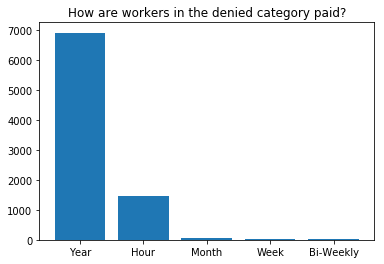

In [88]:
denied_pay= denied.pw_unit_of_pay.value_counts()
plt.bar(denied_pay.index,denied_pay)
plt.title("How are workers in the denied category paid?")

Text(0.5, 1.0, 'How are workers in the certified category paid?')

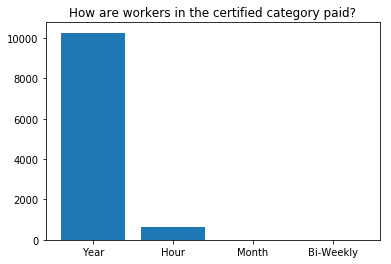

In [89]:
certified_pay= certified.pw_unit_of_pay.value_counts()
plt.bar(certified_pay.index,certified_pay)
plt.title("How are workers in the certified category paid?")

In [90]:
#The denied category seems to have a higher proportion of workers paid hourly, ie contracters

In [91]:
#Lets look at the average employment duration of the denied class
print ("The avg employment duration of the denied category is "+str(denied.employment_length.value_counts().mean()))

The avg employment duration of the denied category is 18.04255319148936


In [92]:
print ("The avg employment duration of the certified category is "+ str(certified.employment_length.value_counts().mean()))

The avg employment duration of the certified category is 22.503092783505156


In [93]:
X= df.drop(["case_status"],1)

In [94]:
X.shape

(19394, 28)

In [95]:
X= pd.get_dummies(X)

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
y= df["case_status"]
le= LabelEncoder()
le.fit(y)
y= le.transform(y)

In [98]:
from sklearn.model_selection import train_test_split as tts

In [99]:
X_train,X_test,y_train,y_test= tts(X,y,test_size=0.3,random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [101]:
lreg= LogisticRegression()

In [102]:
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
y_pred=lreg.predict(X_test)

In [104]:
lreg_score= accuracy_score(y_test,y_pred)

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dtc= DecisionTreeClassifier()

In [107]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
y_pred_dtc= dtc.predict(X_test)

In [109]:
dtc_score= accuracy_score(y_test,y_pred_dtc)

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf= RandomForestClassifier(n_estimators=300)

In [112]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
y_pred_rf= rf.predict(X_test)
rf_score= accuracy_score(y_test,y_pred_rf)

In [114]:
#We can also see the top 10 most important features through using Random Forest

importances_rf = pd.Series(rf.feature_importances_,
                          index = X.columns)
sorted_importances = importances_rf.sort_values(ascending=False)
sorted_importances.head(10)

application_duration                       0.183940
wage_rate_of_pay_from                      0.054598
prevailing_wage                            0.048203
employment_length                          0.030514
wage_rate_of_pay_to                        0.018654
h1b_dependent_N                            0.015456
pw_source_other_OFLC ONLINE DATA CENTER    0.014717
h1b_dependent_Y                            0.013468
naics_code_541511                          0.013079
new_employment                             0.012681
dtype: float64

In [115]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [116]:
gnb = GaussianNB()

In [117]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [118]:
y_pred_nb= gnb.predict(X_test)

In [119]:
nb_score= accuracy_score(y_test,y_pred_nb)

In [120]:
scores = {}
scores["Logistic Regression"]= lreg_score
scores["Decision Tree"]= dtc_score
scores["Random Forest"]= rf_score
scores["Naive Bayes"]= nb_score

In [121]:
scores

{'Logistic Regression': 0.7552844131294036,
 'Decision Tree': 0.8334765423612305,
 'Random Forest': 0.8530675373775563,
 'Naive Bayes': 0.5846365354871971}

In [122]:
scores_df= pd.DataFrame.from_dict(scores,orient= "index", columns= ["Accuracy Scores"])

In [123]:
scores_df

,Accuracy Scores
Logistic Regression,0.755284
Decision Tree,0.833477
Random Forest,0.853068
Naive Bayes,0.584637


In [130]:
#Random forest gives the highest accuracy